# Breast Cancer Detection 
## Using Deep Neural Network (Classification)
### Rana Karmakar
#### National Skill Training Institite, Bhubaneswar

### Description
Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods based on learning data representations, as opposed to task-specific algorithms. Learning can be supervised, semi-supervised or unsupervised.

Deep learning models are loosely related to information processing and communication patterns in a biological nervous system, such as neural coding that attempts to define a relationship between various stimuli and associated neuronal responses in the brain.

### Implementation - Jupyter Notebook (Python)
1. Dataset- sklearn.datasets
2. I have used 30 features to classify
3. Results - 0=benign and 1=malignant

# Importing Libraries

In [71]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np


# Loading Dataset

In [6]:
data= load_breast_cancer()


# Unique Keys in the Dataset

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print (data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Shape of the Dataset

In [9]:
print (data['data'].shape)

(569, 30)


# Fetures in the Dataset

In [10]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data['data'][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [12]:
j=0
for i in data['feature_names']:
    print(i,":",data['data'][0][j])
    j+=1
    

mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [13]:
feature = data['data']
feature.shape

(569, 30)

In [14]:
label = data['target']

In [15]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

# Applying StandardScaler

In [16]:
scale = StandardScaler()
feature = scale.fit_transform(feature)


# After applying StandardScaler

In [17]:
j=0
for i in data['feature_names']:
    print(i,":",feature[0][j])
    j+=1

mean radius : 1.0970639814699807
mean texture : -2.0733350146975935
mean perimeter : 1.2699336881399383
mean area : 0.9843749048031144
mean smoothness : 1.568466329243428
mean compactness : 3.2835146709868264
mean concavity : 2.652873983743168
mean concave points : 2.532475216403245
mean symmetry : 2.2175150059646405
mean fractal dimension : 2.255746885296269
radius error : 2.4897339267376193
texture error : -0.5652650590684639
perimeter error : 2.833030865855184
area error : 2.4875775569611043
smoothness error : -0.21400164666895383
compactness error : 1.3168615683959484
concavity error : 0.72402615808036
concave points error : 0.6608199414286064
symmetry error : 1.1487566671861758
fractal dimension error : 0.9070830809973359
worst radius : 1.8866896251792757
worst texture : -1.3592934737640827
worst perimeter : 2.3036006236225606
worst area : 2.0012374893299207
worst smoothness : 1.3076862710715387
worst compactness : 2.616665023512603
worst concavity : 2.1095263465722556
worst conca

# Data we have to pass

In [18]:
print(feature[0])
print(data['target_names'][label[0]])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
malignant


# Data In Table Format

In [19]:
df=pd.DataFrame(feature , columns = data['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# Data Distribution

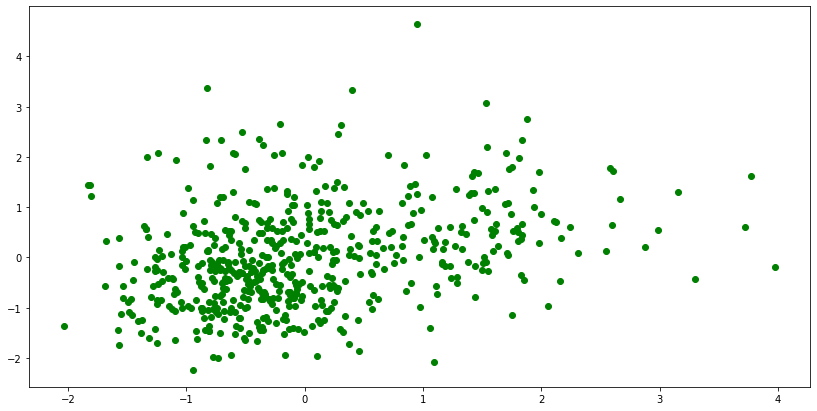

In [110]:
plt.figure(figsize=(14, 7))
plt.scatter(df['mean radius'], df['mean texture'], c='green')

# Density in mean Radius

<AxesSubplot:xlabel='mean radius', ylabel='Density'>

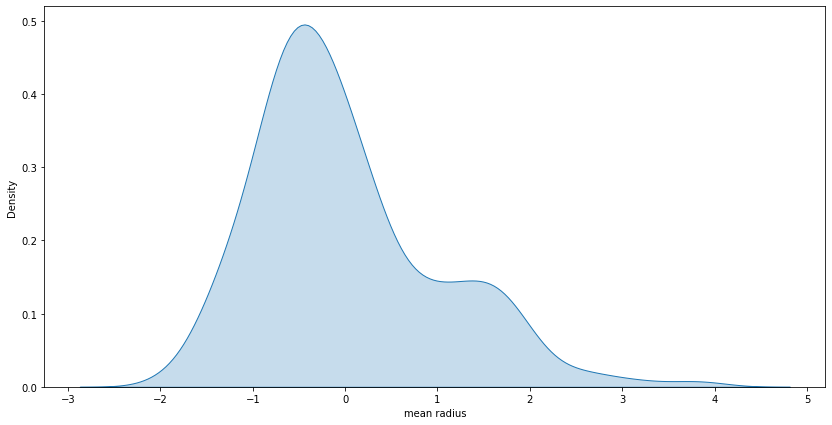

In [81]:
plt.figure(figsize=(14, 7))
sns.kdeplot(df["mean radius"], shade=True)

# Density in Distplot

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean area', ylabel='Density'>

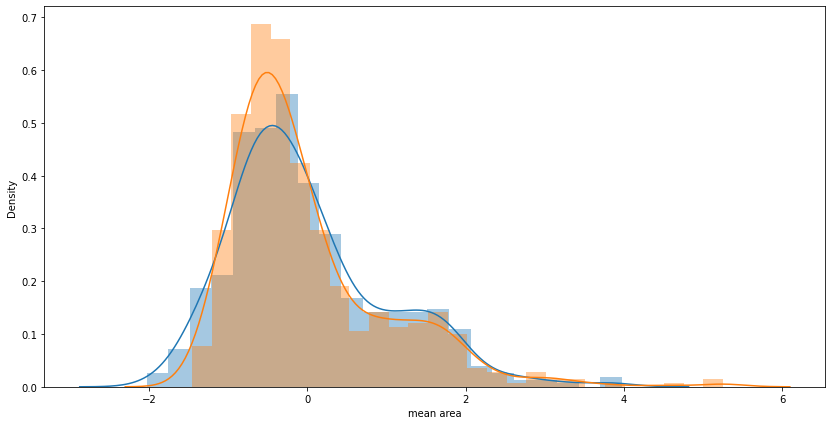

In [83]:
plt.figure(figsize=(14, 7))
sns.distplot(df['mean radius'])
sns.distplot(df['mean area'])

# Relation Between mean Radius and Mean Symmetry

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 504x504 with 0 Axes>

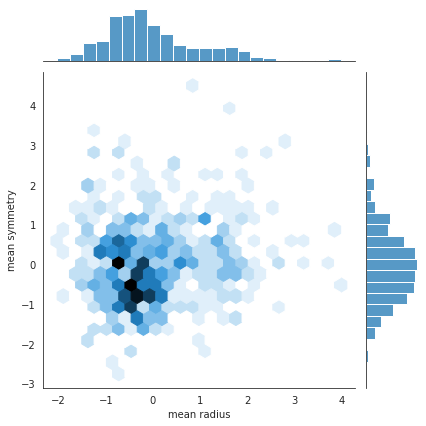

In [111]:
plt.figure(figsize=(7, 7))
with sns.axes_style('white'):
    sns.jointplot("mean radius", "mean symmetry", df, kind='hex')

# Data Distribution in Pairplot

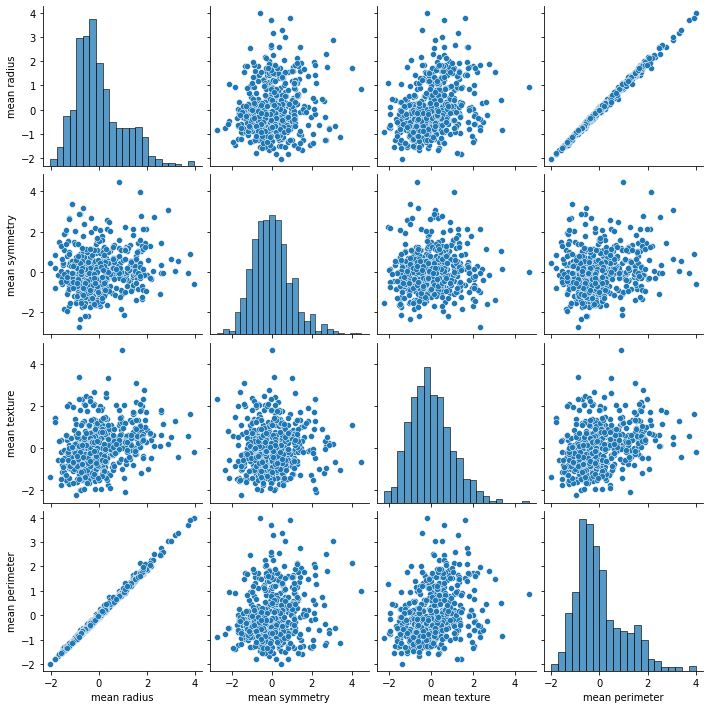

In [96]:
sns.pairplot(df[["mean radius","mean symmetry","mean texture","mean perimeter"]])

# Spliting Dataset into Train and Test

In [20]:
#500 Training
X_train = feature[:500]
y_train = label[:500]

#35 Validation
X_val = feature[500:535]
y_val = label[500:535]

#34 Testing
X_test = feature[535:]
y_test = label[535:]


# Model Building and Complie the Model
## Sequential



In [21]:
model = Sequential()

# Adding Activation Funtions

In [22]:
model.add(Dense(15 , activation ='relu', input_dim = 30))
model.add(Dense(15 , activation = 'relu' )) 

model.add(Dense(1 ,  activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics =['accuracy'])

# Train the Model
We can change epochs value for batter Accuracy

In [23]:
model.fit(X_train , y_train , epochs = 15, validation_data = (X_val, y_val))

Epoch 1/15
16/16 [==============================] - 0s 16ms/step - loss: 0.7142 - accuracy: 0.5220 - val_loss: 0.7305 - val_accuracy: 0.4286
Epoch 2/15
16/16 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7460 - val_loss: 0.5810 - val_accuracy: 0.7143
Epoch 3/15
16/16 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8780 - val_loss: 0.4634 - val_accuracy: 0.8286
Epoch 4/15
16/16 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.9360 - val_loss: 0.3696 - val_accuracy: 0.8286
Epoch 5/15
16/16 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9500 - val_loss: 0.2960 - val_accuracy: 0.8857
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 0.1936 - accuracy: 0.9560 - val_loss: 0.2417 - val_accuracy: 0.8857
Epoch 7/15
16/16 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9580 - val_loss: 0.2025 - val_accuracy: 0.9143
Epoch 8/15
16/16 [=

# Evaluate the model

In [25]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.1181 - accuracy: 0.9118


[0.11811310052871704, 0.9117646813392639]

# Prediction 
Here we pass value (Any Row from the Dataset) in Range Funtion.

In [31]:
for i in range(10):
  sample = X_test[i]
  sample = np.reshape(sample,(1,30))
  print ("Predicting value")
  if model.predict(sample)[0][0] > 0.5:
    print("          Benign")
  else:
    print("          Malignent")
    print("--------------------")
  print("Actual Value")

  if y_test[i] == 1:
    print("               Benign")
  else:
    print("               Malignent")
    

Predicting value
          Malignent
--------------------
Actual Value
               Malignent
Predicting value
          Malignent
--------------------
Actual Value
               Malignent
Predicting value
          Malignent
--------------------
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
Predicting value
          Malignent
--------------------
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
Predicting value
          Benign
Actual Value
               Benign
